In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 50)

import networkx as nx
from networkx.algorithms import bipartite

import pycountry_convert

import matplotlib.pyplot as plt
import plotly
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.io as pio

init_notebook_mode(connected=True)

# Data preparation

## H2020

In [3]:
h2020_projects = pd.read_csv('../data/processed/h2020-projects.csv', delimiter='\t', header=None)
h2020_projects.columns = ['rcn', 'reference', 'acronym', 'title', 'total_cost', 'ec_contribution',
                    'teaser', 'objective', 'start', 'end', 'status']
h2020_projects.head()

,rcn,reference,acronym,title,total_cost,ec_contribution,teaser,objective,start,end,status
0,195398,657139,stromamech,targeting stromal cells to modify tumor mechan...,151648.80,151648.80,current chemotherapeutic agents are potent eno...,current chemotherapeutic agents are potent eno...,2015-05-01,2017-04-30,signed
1,199945,691161,geo-safe,geospatial based environment for optimisation...,1386000.00,1080000.00,"in eu and australia, every year thousands of s...","in eu and australia, every year thousands of s...",2016-05-01,2020-04-30,signed
2,207081,738654,vr-energy,"a reliable, efficient, flexible and cost ffect...",2390000.00,1673000.00,hydraredox iberia s.l. is a spanish sme formed...,hydraredox iberia s.l. is a spanish sme formed...,2016-12-01,2018-11-30,signed
3,211829,756785,fun-pm,fundamental understanding of nanoparticle chem...,1493838.77,1493838.77,while modern societies are facing urgent chall...,while modern societies are facing urgent chall...,2018-02-01,2023-01-31,signed
4,212770,758865,bioele,functional biointerface elements via biomicrof...,1486938.00,1486938.00,"imagine in the future, bionic devices that can...","imagine in the future, bionic devices that can...",2018-01-01,2022-12-31,signed


In [4]:
h2020_organisations = pd.read_csv('../data/processed/h2020-organisations.csv', delimiter='\t', header=None)
h2020_organisations.columns = ['rcn', 'org_id', 'org_rcn', 'order', 'org_type',
                               'short_name', 'legal_name', 'city', 'country', 'contribution']
h2020_organisations.head()

,rcn,org_id,org_rcn,order,org_type,short_name,legal_name,city,country,contribution
0,195398,999835843,1905890.0,1,coordinator,ucy,university of cyprus,nicosia,cy,151648.8
1,199945,998929669,1908315.0,16,participant,upd,universite paris dauphine,paris cedex 16,fr,45000.0
2,199945,989393987,1931502.0,5,participant,efm,entente pour la forêt méditerranéenne,gardanne,fr,36000.0
3,199945,916450860,2791186.0,14,participant,uca,universite clermont auvergne,clermont-ferrand,fr,45000.0
4,199945,999974650,1906418.0,9,participant,unige,universite de geneve,geneve,ch,40500.0


## FP7

In [5]:
fp7_projects = pd.read_csv('../data/processed/fp7-projects.csv', delimiter='\t', header=None)
fp7_projects.columns = ['rcn', 'reference', 'acronym', 'title', 'total_cost', 'ec_contribution',
                    'teaser', 'objective', 'start', 'end', 'status']
fp7_projects.describe(include='all')

,rcn,reference,acronym,title,total_cost,ec_contribution,teaser,objective,start,end,status
count,25778.000000,25778.000000,25778,25778,2.577800e+04,2.577800e+04,25778,25778,25658,25658,25584
unique,NaN,NaN,24310,25616,NaN,NaN,25670,25709,1103,1650,3
top,NaN,NaN,impact,erwin schroedinger fellowships,NaN,NaN,the aim of this project is to reinforce the sy...,"in the present project, we propose a pioneer r...",2013-10-01,2015-12-31,ong
freq,NaN,NaN,15,3,NaN,NaN,3,2,617,522,23442
mean,108674.010823,328680.648770,NaN,NaN,2.492582e+06,1.763046e+06,NaN,NaN,NaN,NaN,NaN
std,28349.164969,138540.352039,NaN,NaN,6.987579e+06,3.251901e+06,NaN,NaN,NaN,NaN,NaN
min,85231.000000,100016.000000,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,94138.250000,244593.250000,NaN,NaN,1.847094e+05,1.838058e+05,NaN,NaN,NaN,NaN,NaN
50%,100905.500000,281303.500000,NaN,NaN,1.200000e+06,9.999600e+05,NaN,NaN,NaN,NaN,NaN
75%,107693.750000,323413.750000,NaN,NaN,2.927080e+06,2.475698e+06,NaN,NaN,NaN,NaN,NaN


In [6]:
fp7_organisations = pd.read_csv('../data/processed/fp7-organisations.csv', delimiter='\t', header=None)
fp7_organisations.columns = ['rcn', 'org_id', 'org_rcn', 'order', 'org_type',
                            'short_name', 'legal_name', 'city', 'country', 'contribution']
fp7_organisations.describe(include='all')

,rcn,org_id,org_rcn,order,org_type,short_name,legal_name,city,country,contribution
count,139661.000000,1.389460e+05,1.396340e+05,139661.000000,139661,139476,139661,139638,139658,1.315060e+05
unique,NaN,NaN,NaN,NaN,4,26048,30889,9681,178,NaN
top,NaN,NaN,NaN,NaN,participant,cnrs,centre national de la recherche scientifique cnrs,paris,de,NaN
freq,NaN,NaN,NaN,NaN,112701,1404,1652,4412,18764,NaN
mean,106349.584465,9.919283e+08,1.993935e+06,7.972863,NaN,NaN,NaN,NaN,NaN,3.368907e+05
std,26301.739562,1.888405e+07,2.120217e+05,10.732221,NaN,NaN,NaN,NaN,NaN,9.026898e+05
min,85231.000000,8.888977e+08,1.534630e+06,-999.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,93343.000000,9.972614e+08,1.906199e+06,2.000000,NaN,NaN,NaN,NaN,NaN,8.995618e+04
50%,100437.000000,9.996454e+08,1.908889e+06,6.000000,NaN,NaN,NaN,NaN,NaN,2.038518e+05
75%,107002.000000,9.999588e+08,1.947428e+06,10.000000,NaN,NaN,NaN,NaN,NaN,3.814568e+05


## FP6

In [7]:
fp6_projects = pd.read_csv('../data/processed/fp6-projects.csv', delimiter='\t', header=None)
fp6_projects.columns = ['rcn', 'reference', 'acronym', 'title', 'total_cost', 'ec_contribution',
                    'teaser', 'objective', 'start', 'end', 'status']
fp6_projects.describe(include='all')

,rcn,reference,acronym,title,total_cost,ec_contribution,teaser,objective,start,end,status
count,10101.000000,10101,10007,10098,10012,10015,10087,10087,9985,9905,234
unique,NaN,10098,9657,10043,5783,6440,9892,9935,600,675,2
top,NaN,502515,idea,electron self trapping in supercritical co2,0,80000,to be completed.,to be completed.,2005-09-01,2008-12-31,clo
freq,NaN,2,6,2,3552,397,150,150,551,415,173
mean,80429.267498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6368.487648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,22115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,75084.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,80810.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,83563.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
fp6_organisations = pd.read_csv('../data/processed/fp6-organisations.csv', delimiter='\t', header=None)
fp6_organisations.columns = ['rcn', 'org_id', 'org_rcn', 'order', 'org_type',
                            'short_name', 'legal_name', 'city', 'country', 'contribution']
fp6_organisations.describe(include='all')

,rcn,org_id,org_rcn,order,org_type,short_name,legal_name,city,country,contribution
count,75311.000000,1.106000e+03,7.531100e+04,75311.000000,75311,45402,75269,73685,74820,3.279000e+03
unique,NaN,NaN,NaN,NaN,2,17395,33416,9197,158,NaN
top,NaN,NaN,NaN,NaN,participant,tbc,centre national de la recherche scientifique,paris,de,NaN
freq,NaN,NaN,NaN,NaN,65210,638,671,2845,10521,NaN
mean,79544.272417,9.737695e+08,1.480013e+06,10.114113,NaN,NaN,NaN,NaN,NaN,2.752381e+05
std,6646.850637,1.544520e+08,3.368931e+05,11.674608,NaN,NaN,NaN,NaN,NaN,3.821866e+05
min,22115.000000,1.050000e+02,5.174500e+04,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,74590.000000,9.990128e+08,1.374662e+06,3.000000,NaN,NaN,NaN,NaN,NaN,4.252350e+04
50%,79257.000000,9.995746e+08,1.438065e+06,7.000000,NaN,NaN,NaN,NaN,NaN,1.856210e+05
75%,82432.000000,9.999097e+08,1.522692e+06,13.000000,NaN,NaN,NaN,NaN,NaN,3.674785e+05


## FP5

In [9]:
fp5_projects = pd.read_csv('../data/processed/fp5-projects.csv', delimiter='\t', header=None)
fp5_projects.columns = ['rcn', 'reference', 'acronym', 'title', 'total_cost', 'ec_contribution',
                    'teaser', 'objective', 'start', 'end', 'status']
fp5_projects.describe(include='all')

,rcn,reference,acronym,title,total_cost,ec_contribution,teaser,objective,start,end,status
count,16405.000000,16405,11433,16405,1.552700e+04,1.552100e+04,11677,11715,15989,15327,0.0
unique,NaN,16405,10380,16131,NaN,NaN,11203,11472,1121,1331,NaN
top,NaN,ist-2001-38458,notification of basi,fusion technology 1-technology for net 2-blank...,NaN,NaN,not available,not available,2002-01-01,2002-12-31,NaN
freq,NaN,1,116,68,NaN,NaN,173,173,752,559,NaN
mean,63249.838281,NaN,NaN,NaN,1.265216e+06,7.429820e+05,NaN,NaN,NaN,NaN,NaN
std,8721.368564,NaN,NaN,NaN,3.722761e+06,1.485791e+06,NaN,NaN,NaN,NaN,NaN
min,51150.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,56520.000000,NaN,NaN,NaN,1.068720e+05,1.031900e+05,NaN,NaN,NaN,NaN,NaN
50%,61973.000000,NaN,NaN,NaN,3.408000e+05,2.740000e+05,NaN,NaN,NaN,NaN,NaN
75%,68119.000000,NaN,NaN,NaN,1.664462e+06,1.190000e+06,NaN,NaN,NaN,NaN,NaN


In [10]:
fp5_organisations = pd.read_csv('../data/processed/fp5-organisations.csv', delimiter='\t', header=None)
fp5_organisations.columns = ['rcn', 'org_id', 'org_rcn', 'order', 'org_type',
                            'short_name', 'legal_name', 'city', 'country', 'contribution']
fp5_organisations.describe(include='all')

,rcn,org_id,org_rcn,order,org_type,short_name,legal_name,city,country,contribution
count,75582.000000,0.0,7.558200e+04,75582.000000,75582,2337,75072,73321,74951,0.0
unique,NaN,NaN,NaN,NaN,2,725,26415,8563,147,NaN
top,NaN,NaN,NaN,NaN,participant,tbc,centre national de la recherche scientifique,london,de,NaN
freq,NaN,NaN,NaN,NaN,59177,54,1133,1713,10512,NaN
mean,61772.948731,NaN,8.356496e+05,6.491744,NaN,NaN,NaN,NaN,NaN,NaN
std,8654.687152,NaN,4.090329e+05,8.943967,NaN,NaN,NaN,NaN,NaN,NaN
min,51150.000000,NaN,5.155400e+04,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,54841.000000,NaN,5.879790e+05,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,60304.000000,NaN,8.582430e+05,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,66363.750000,NaN,1.001506e+06,8.000000,NaN,NaN,NaN,NaN,NaN,NaN


## FP4

In [11]:
fp4_projects = pd.read_csv('../data/processed/fp4-projects.csv', delimiter='\t', header=None)
fp4_projects.columns = ['rcn', 'reference', 'acronym', 'title', 'total_cost', 'ec_contribution',
                    'teaser', 'objective', 'start', 'end', 'status']
fp4_projects.describe(include='all')

,rcn,reference,acronym,title,total_cost,ec_contribution,teaser,objective,start,end,status
count,14527.000000,14527,5358,14527,3.896000e+03,4.113000e+03,6365,11632,13705,13641,3
unique,NaN,14527,4957,14521,NaN,NaN,6319,11589,700,916,1
top,NaN,brst970603,impact,"corporate governance,innovation and economic p...",NaN,NaN,rtd actions implementing enrich are part of ...,rtd actions implementing enrich are part of ...,1996-01-01,1998-12-31,clo
freq,NaN,1,9,2,NaN,NaN,31,28,873,529,3
mean,41137.550148,NaN,NaN,NaN,1.969306e+06,9.036885e+05,NaN,NaN,NaN,NaN,NaN
std,6350.123322,NaN,NaN,NaN,3.480651e+06,1.442004e+06,NaN,NaN,NaN,NaN,NaN
min,29005.000000,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,37027.500000,NaN,NaN,NaN,3.475000e+05,2.220000e+05,NaN,NaN,NaN,NaN,NaN
50%,41412.000000,NaN,NaN,NaN,1.087150e+06,5.240000e+05,NaN,NaN,NaN,NaN,NaN
75%,45246.500000,NaN,NaN,NaN,2.380195e+06,1.189000e+06,NaN,NaN,NaN,NaN,NaN


In [12]:
fp4_organisations = pd.read_csv('../data/processed/fp4-organisations.csv', delimiter='\t', header=None)
fp4_organisations.columns = ['rcn', 'org_id', 'org_rcn', 'order', 'org_type',
                            'short_name', 'legal_name', 'city', 'country', 'contribution']
fp4_organisations.describe(include='all')

,rcn,org_id,org_rcn,order,org_type,short_name,legal_name,city,country,contribution
count,67868.000000,1.300000e+01,6.786800e+04,67868.000000,67868,894,67705,60728,67573,0.0
unique,NaN,NaN,NaN,NaN,2,299,26380,8944,144,NaN
top,NaN,NaN,NaN,NaN,participant,ecn,not available,london,uk,NaN
freq,NaN,NaN,NaN,NaN,53341,35,2272,1423,10661,NaN
mean,40311.165837,9.887361e+08,5.225994e+05,4.876525,NaN,NaN,NaN,NaN,NaN,NaN
std,6504.074686,2.661906e+07,1.816324e+05,5.129627,NaN,NaN,NaN,NaN,NaN,NaN
min,29005.000000,9.249907e+08,5.155400e+04,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,35198.000000,9.995074e+08,4.201000e+05,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,40156.500000,9.995789e+08,5.485845e+05,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,45491.000000,9.999804e+08,6.409465e+05,6.000000,NaN,NaN,NaN,NaN,NaN,NaN


## FP3

In [13]:
fp3_projects = pd.read_csv('../data/processed/fp3-projects.csv', delimiter='\t', header=None)
fp3_projects.columns = ['rcn', 'reference', 'acronym', 'title', 'total_cost', 'ec_contribution',
                    'teaser', 'objective', 'start', 'end', 'status']
fp3_projects.describe(include='all')

,rcn,reference,acronym,title,total_cost,ec_contribution,teaser,objective,start,end,status
count,5527.000000,5527,1815,5527,5.510000e+02,1.108000e+03,4204,4247,5239,5236,0.0
unique,NaN,5527,1719,5448,NaN,NaN,4192,4243,176,249,NaN
top,NaN,9090,medalus ii,improved coatings on metals using fluidized be...,NaN,NaN,the major bottleneck for battery driven electr...,the study intends to develop a concept for c...,1994-01-01,1995-12-31,NaN
freq,NaN,1,4,2,NaN,NaN,3,2,592,435,NaN
mean,19279.897594,NaN,NaN,NaN,1.432972e+06,1.013993e+06,NaN,NaN,NaN,NaN,NaN
std,8456.255292,NaN,NaN,NaN,3.390830e+06,1.100837e+06,NaN,NaN,NaN,NaN,NaN
min,4257.000000,NaN,NaN,NaN,3.000000e+04,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,9112.500000,NaN,NaN,NaN,3.297510e+05,4.084750e+05,NaN,NaN,NaN,NaN,NaN
50%,22516.000000,NaN,NaN,NaN,7.100000e+05,8.500000e+05,NaN,NaN,NaN,NaN,NaN
75%,25657.500000,NaN,NaN,NaN,1.605664e+06,1.370410e+06,NaN,NaN,NaN,NaN,NaN


In [14]:
fp3_organisations = pd.read_csv('../data/processed/fp3-organisations.csv', delimiter='\t', header=None)
fp3_organisations.columns = ['rcn', 'org_id', 'org_rcn', 'order', 'org_type',
                            'short_name', 'legal_name', 'city', 'country', 'contribution']
fp3_organisations.describe(include='all')

,rcn,org_id,org_rcn,order,org_type,short_name,legal_name,city,country,contribution
count,31364.000000,0.0,3.136400e+04,31364.000000,31364,503,31360,30379,31327,0.0
unique,NaN,NaN,NaN,NaN,2,171,10275,3637,110,NaN
top,NaN,NaN,NaN,NaN,participant,ecn,centre national de la recherche scientifique,paris,fr,NaN
freq,NaN,NaN,NaN,NaN,25840,55,442,826,5135,NaN
mean,19019.408111,NaN,3.179127e+05,5.269290,NaN,NaN,NaN,NaN,NaN,NaN
std,8434.392851,NaN,1.103281e+05,5.353462,NaN,NaN,NaN,NaN,NaN,NaN
min,4257.000000,NaN,5.155400e+04,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,9094.750000,NaN,2.613170e+05,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,22117.000000,NaN,3.458130e+05,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,25568.000000,NaN,3.560800e+05,7.000000,NaN,NaN,NaN,NaN,NaN,NaN


## FP2

In [15]:
fp2_projects = pd.read_csv('../data/processed/fp2-projects.csv', delimiter='\t', header=None)
fp2_projects.columns = ['rcn', 'reference', 'acronym', 'title', 'total_cost', 'ec_contribution',
                    'teaser', 'objective', 'start', 'end', 'status']
fp2_projects.describe(include='all')

,rcn,reference,acronym,title,total_cost,ec_contribution,teaser,objective,start,end,status
count,3884.000000,3884,801,3884,1.870000e+02,4.520000e+02,3078,3113,3452,3452,0.0
unique,NaN,3884,758,3834,NaN,NaN,3026,3096,199,304,NaN
top,NaN,jour0011,smart,the control of sexual and sporogonic different...,NaN,NaN,the primary objective is to produce basic know...,neant,1991-01-01,1992-12-31,NaN
freq,NaN,1,2,4,NaN,NaN,6,6,170,150,NaN
mean,8178.693100,NaN,NaN,NaN,1.089752e+06,3.470609e+05,NaN,NaN,NaN,NaN,NaN
std,7819.054539,NaN,NaN,NaN,1.894199e+06,6.237336e+05,NaN,NaN,NaN,NaN,NaN
min,104.000000,NaN,NaN,NaN,3.000000e+04,1.100000e+03,NaN,NaN,NaN,NaN,NaN
25%,2698.750000,NaN,NaN,NaN,3.000000e+05,8.800000e+04,NaN,NaN,NaN,NaN,NaN
50%,4177.500000,NaN,NaN,NaN,6.000000e+05,1.740000e+05,NaN,NaN,NaN,NaN,NaN
75%,14484.250000,NaN,NaN,NaN,1.103216e+06,4.000000e+05,NaN,NaN,NaN,NaN,NaN


In [16]:
fp2_organisations = pd.read_csv('../data/processed/fp2-organisations.csv', delimiter='\t', header=None)
fp2_organisations.columns = ['rcn', 'org_id', 'org_rcn', 'order', 'org_type',
                            'short_name', 'legal_name', 'city', 'country', 'contribution']
fp2_organisations.describe(include='all')

,rcn,org_id,org_rcn,order,org_type,short_name,legal_name,city,country,contribution
count,19075.000000,0.0,1.907500e+04,19075.000000,19075,578,19074,16953,18965,0.0
unique,NaN,NaN,NaN,NaN,2,128,6804,2133,67,NaN
top,NaN,NaN,NaN,NaN,participant,ptb,centre national de la recherche scientifique (...,paris,fr,NaN
freq,NaN,NaN,NaN,NaN,15191,50,229,597,3483,NaN
mean,10462.444194,NaN,2.682588e+05,5.072975,NaN,NaN,NaN,NaN,NaN,NaN
std,8463.969674,NaN,1.375045e+05,4.885576,NaN,NaN,NaN,NaN,NaN,NaN
min,104.000000,NaN,5.155400e+04,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,3079.000000,NaN,1.291970e+05,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,8363.000000,NaN,3.319650e+05,4.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,17204.000000,NaN,3.493850e+05,6.000000,NaN,NaN,NaN,NaN,NaN,NaN


# Data analysis

In [17]:
all_organisations = pd.concat([h2020_organisations, fp7_organisations, fp6_organisations, fp5_organisations, fp4_organisations, fp3_organisations, fp2_organisations])
all_projects = pd.concat([h2020_projects, fp7_projects, fp6_projects, fp5_projects, fp4_projects, fp3_projects, fp2_projects])

In [18]:
project_periods = all_projects[['rcn', 'start', 'end']]

In [19]:
all_organisations = pd.merge(all_organisations, project_periods, left_on='rcn', right_on='rcn')
all_organisations.head()

,rcn,org_id,org_rcn,order,org_type,short_name,legal_name,city,country,contribution,start,end
0,195398,999835843.0,1905890.0,1,coordinator,ucy,university of cyprus,nicosia,cy,151648.8,2015-05-01,2017-04-30
1,199945,998929669.0,1908315.0,16,participant,upd,universite paris dauphine,paris cedex 16,fr,45000.0,2016-05-01,2020-04-30
2,199945,989393987.0,1931502.0,5,participant,efm,entente pour la forêt méditerranéenne,gardanne,fr,36000.0,2016-05-01,2020-04-30
3,199945,916450860.0,2791186.0,14,participant,uca,universite clermont auvergne,clermont-ferrand,fr,45000.0,2016-05-01,2020-04-30
4,199945,999974650.0,1906418.0,9,participant,unige,universite de geneve,geneve,ch,40500.0,2016-05-01,2020-04-30


In [20]:
all_organisations = all_organisations[(all_organisations.rcn.notna() &
                                     all_organisations.org_id.notna() &
                                     all_organisations.start.notna() &
                                     all_organisations.end.notna())]

In [21]:
all_organisations.describe(include='all')

,rcn,org_id,org_rcn,order,org_type,short_name,legal_name,city,country,contribution,start,end
count,236226.000000,2.362260e+05,2.361850e+05,236226.000000,236226,234968,236220,236201,236217,2.220570e+05,236226,236226
unique,NaN,NaN,NaN,NaN,5,41168,48660,13096,190,NaN,1651,2296
top,NaN,NaN,NaN,NaN,participant,cnrs,centre national de la recherche scientifique cnrs,paris,de,NaN,2017-01-01,2018-12-31
freq,NaN,NaN,NaN,NaN,181579,2278,2579,7342,30605,NaN,6071,5103
mean,146852.693298,9.861949e+08,2.032064e+06,11.307075,NaN,NaN,NaN,NaN,NaN,3.724532e+05,NaN,NaN
std,53451.794298,2.777650e+07,2.586730e+05,58.100337,NaN,NaN,NaN,NaN,NaN,1.088641e+06,NaN,NaN
min,71137.000000,1.050000e+02,1.905548e+06,-999.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
25%,97716.000000,9.881460e+08,1.906232e+06,2.000000,NaN,NaN,NaN,NaN,NaN,9.612500e+04,NaN,NaN
50%,110093.000000,9.995868e+08,1.910169e+06,5.000000,NaN,NaN,NaN,NaN,NaN,2.150000e+05,NaN,NaN
75%,203712.000000,9.999324e+08,2.001970e+06,10.000000,NaN,NaN,NaN,NaN,NaN,4.167500e+05,NaN,NaN


In [22]:
from datetime import datetime
def get_edge_labels(start, end):
    return range(datetime.strptime(start, '%Y-%m-%d').year,\
                 datetime.strptime(end, '%Y-%m-%d').year+1)

In [23]:
projects_nodes = all_organisations.rcn.unique()
organisations_nodes = all_organisations.org_id.unique()

B = nx.Graph()
B.add_nodes_from(projects_nodes, bipartite=0)
B.add_nodes_from(organisations_nodes, bipartite=1)

for index, row in all_organisations.iterrows():
    years = [get_edge_labels(row['start'], row['end'])]
    B.add_edge(row['rcn'], row['org_id'], years=years)

In [24]:
def plotDegreeDistr(graph):
    dh = nx.degree_histogram(graph)
    plt.loglog(dh, linewidth=0, marker='o')
    plt.title("Degree distribution")
    plt.ylabel("Number of nodes")
    plt.xlabel("Node degree")

Name: 
Type: Graph
Number of nodes: 48504
Number of edges: 1168632
Average degree:  48.1870


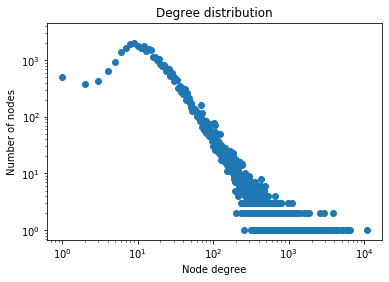

In [25]:
G_org = bipartite.projected_graph(B, organisations_nodes)
print(nx.info(G_org))
plotDegreeDistr(G_org)